# PART 5 : APPLICATION OF UNSUPERVISED LEARNING

> This dataset, found on Kaggle, provides many features regarding social and personal attributes of individuals and their academic performance, more notably the impact of alcohol consumption on their grades.

> With 31 attributes and 649 observations, this dataset is a good candidate for unsupervised learning, by trying to find clusters of students to try correlating behaviors and grades.

> The dataset can be found here : https://www.kaggle.com/datasets/gabrielluizone/high-school-alcoholism-and-academic-performance

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [42]:
df=pd.read_csv('en_lpor_explorer.csv')
df.drop(columns='School',inplace=True)

print('data base 5 first rows \n')
display(df.head())
print('\n')
print('data base information \n')
display(df.info())
print('\n')
print('data base nan values')
display(df.isna().sum())
print('\n database unique values for each column\n')
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
intcolumns=df.select_dtypes(include=['float64','int64']).columns.tolist()
for i in categorical_columns:
    print(f'{i}')
    display(df[i].unique())

data base 5 first rows 



,Gender,Age,Housing_Type,Family_Size,Parental_Status,Mother_Education,Father_Education,Mother_Work,Father_Work,Reason_School_Choice,...,Is_Dating,Good_Family_Relationship,Free_Time_After_School,Time_with_Friends,Alcohol_Weekdays,Alcohol_Weekends,Health_Status,School_Absence,Grade_1st_Semester,Grade_2nd_Semester
0,Female,18,Urban,Above 3,Separated,Higher Education,Higher Education,Homemaker,Teacher,Course Preference,...,No,Good,Moderate,High,Very Low,Very Low,Fair,4,0,11
1,Female,17,Urban,Above 3,Living Together,Primary School,Primary School,Homemaker,other,Course Preference,...,No,Excellent,Moderate,Moderate,Very Low,Very Low,Fair,2,9,11
2,Female,15,Urban,Up to 3,Living Together,Primary School,Primary School,Homemaker,other,Other,...,No,Good,Moderate,Low,Low,Moderate,Fair,6,12,13
3,Female,15,Urban,Above 3,Living Together,Higher Education,Lower Secondary School,Health,Services,Near Home,...,Yes,Fair,Low,Low,Very Low,Very Low,Very Good,0,14,14
4,Female,16,Urban,Above 3,Living Together,High School,High School,other,other,Near Home,...,No,Good,Moderate,Low,Very Low,Low,Very Good,0,11,13




data base information 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 30 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Gender                        649 non-null    object
 1   Age                           649 non-null    int64 
 2   Housing_Type                  649 non-null    object
 3   Family_Size                   649 non-null    object
 4   Parental_Status               649 non-null    object
 5   Mother_Education              649 non-null    object
 6   Father_Education              649 non-null    object
 7   Mother_Work                   649 non-null    object
 8   Father_Work                   649 non-null    object
 9   Reason_School_Choice          649 non-null    object
 10  Legal_Responsibility          649 non-null    object
 11  Commute_Time                  649 non-null    object
 12  Weekly_Study_Time             649 non-null    object

None



data base nan values


Gender                          0
Age                             0
Housing_Type                    0
Family_Size                     0
Parental_Status                 0
Mother_Education                0
Father_Education                0
Mother_Work                     0
Father_Work                     0
Reason_School_Choice            0
Legal_Responsibility            0
Commute_Time                    0
Weekly_Study_Time               0
Extra_Educational_Support       0
Parental_Educational_Support    0
Private_Tutoring                0
Extracurricular_Activities      0
Attended_Daycare                0
Desire_Graduate_Education       0
Has_Internet                    0
Is_Dating                       0
Good_Family_Relationship        0
Free_Time_After_School          0
Time_with_Friends               0
Alcohol_Weekdays                0
Alcohol_Weekends                0
Health_Status                   0
School_Absence                  0
Grade_1st_Semester              0
Grade_2nd_Seme


 database unique values for each column

Gender


array(['Female', 'Male'], dtype=object)

Housing_Type


array(['Urban', 'Rural'], dtype=object)

Family_Size


array(['Above 3', 'Up to 3'], dtype=object)

Parental_Status


array(['Separated', 'Living Together'], dtype=object)

Mother_Education


array(['Higher Education', 'Primary School', 'High School',
       'Lower Secondary School', 'None'], dtype=object)

Father_Education


array(['Higher Education', 'Primary School', 'Lower Secondary School',
       'High School', 'None'], dtype=object)

Mother_Work


array(['Homemaker', 'Health', 'other', 'Services', 'Teacher'],
      dtype=object)

Father_Work


array(['Teacher', 'other', 'Services', 'Health', 'Homemaker'],
      dtype=object)

Reason_School_Choice


array(['Course Preference', 'Other', 'Near Home', 'Reputation'],
      dtype=object)

Legal_Responsibility


array(['Mother', 'Father', 'Other'], dtype=object)

Commute_Time


array(['15 to 30 min', 'Up to 15 min', '30 min to 1h', 'More than 1h'],
      dtype=object)

Weekly_Study_Time


array(['2 to 5h', '5 to 10h', 'Up to 2h', 'More than 10h'], dtype=object)

Extra_Educational_Support


array(['Yes', 'No'], dtype=object)

Parental_Educational_Support


array(['No', 'Yes'], dtype=object)

Private_Tutoring


array(['No', 'Yes'], dtype=object)

Extracurricular_Activities


array(['No', 'Yes'], dtype=object)

Attended_Daycare


array(['Yes', 'No'], dtype=object)

Desire_Graduate_Education


array(['Yes', 'No'], dtype=object)

Has_Internet


array(['No', 'Yes'], dtype=object)

Is_Dating


array(['No', 'Yes'], dtype=object)

Good_Family_Relationship


array(['Good', 'Excellent', 'Fair', 'Very Poor', 'Poor'], dtype=object)

Free_Time_After_School


array(['Moderate', 'Low', 'High', 'Very Low', 'Very High'], dtype=object)

Time_with_Friends


array(['High', 'Moderate', 'Low', 'Very Low', 'Very High'], dtype=object)

Alcohol_Weekdays


array(['Very Low', 'Low', 'Very High', 'Moderate', 'High'], dtype=object)

Alcohol_Weekends


array(['Very Low', 'Moderate', 'Low', 'High', 'Very High'], dtype=object)

Health_Status


array(['Fair', 'Very Good', 'Very Poor', 'Poor', 'Good'], dtype=object)

In [43]:
df=df.fillna(df.median)

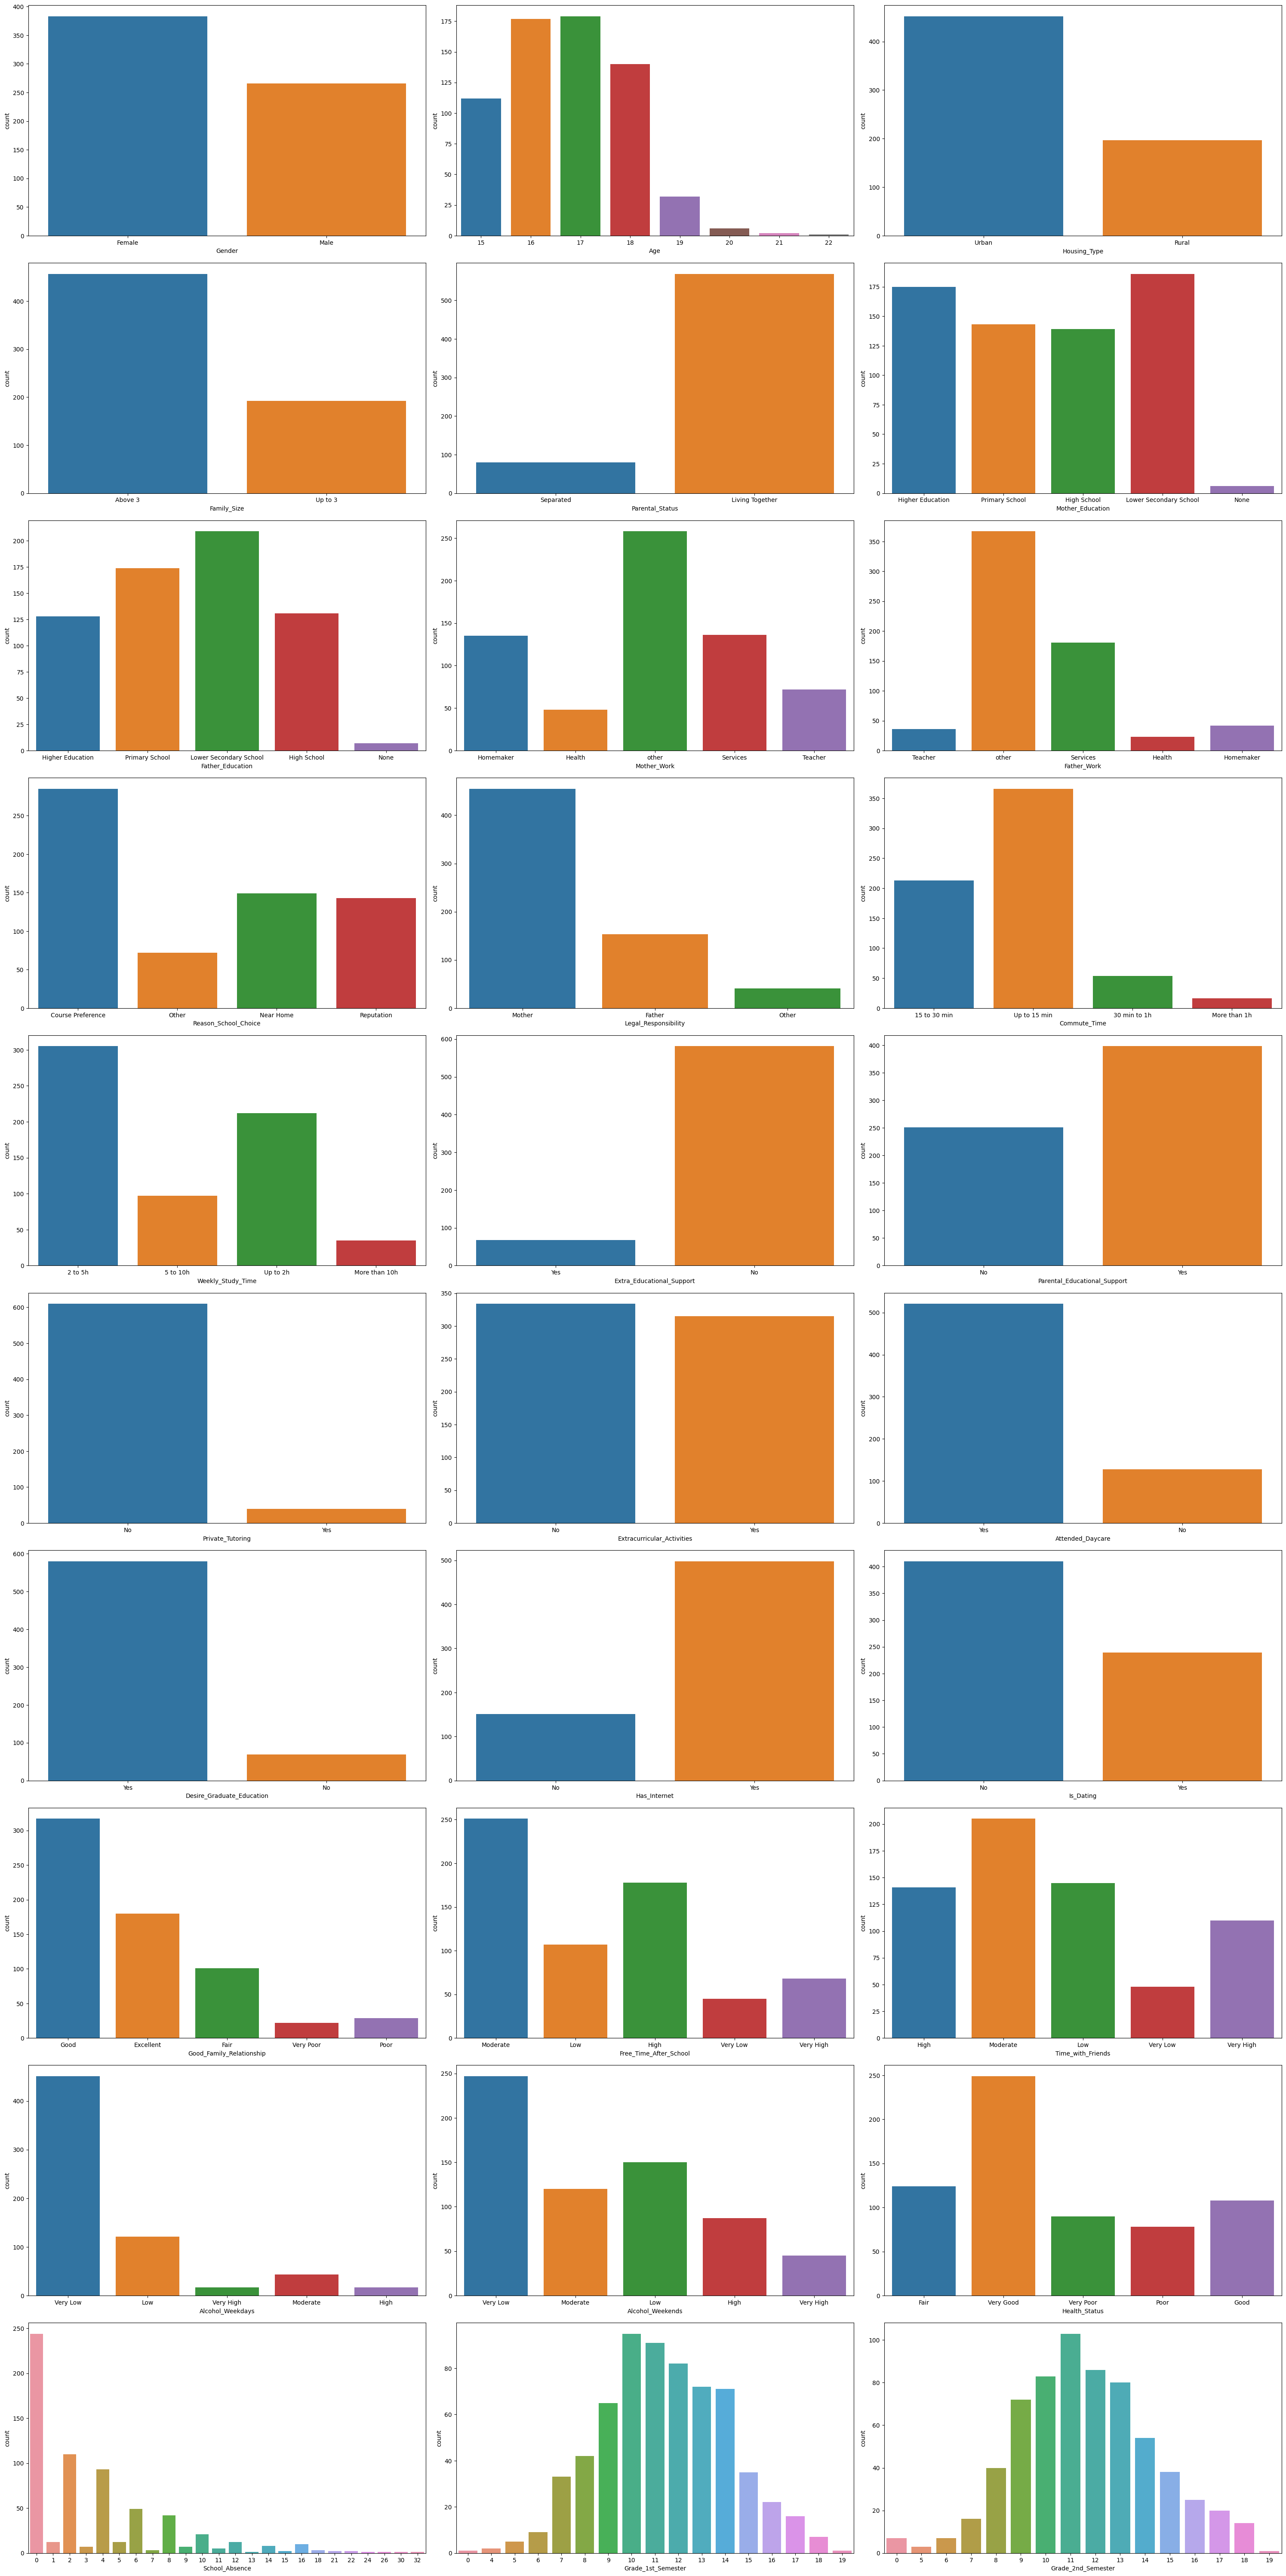

In [44]:
figure,axes=plt.subplots(10,3,figsize=(30,60))
axes=axes.flatten()
count=0
for i in df.columns:
    sns.countplot(df,x=i,ax=axes[count])
    count+=1
plt.tight_layout()
plt.show()

In [45]:
# Import clustering dependencies

from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Encode categorical variables

encoder=LabelEncoder()
OHE=OneHotEncoder()

df['Mother_Education'] = df['Mother_Education'].astype(str)
df['Father_Education'] = df['Father_Education'].astype(str)

for s in categorical_columns:
    try:
        df[s]=encoder.fit_transform(df[s])
    except Exception as e:
        print(f'for {s} we got {e}')

In [46]:
df.head()

,Gender,Age,Housing_Type,Family_Size,Parental_Status,Mother_Education,Father_Education,Mother_Work,Father_Work,Reason_School_Choice,...,Is_Dating,Good_Family_Relationship,Free_Time_After_School,Time_with_Friends,Alcohol_Weekdays,Alcohol_Weekends,Health_Status,School_Absence,Grade_1st_Semester,Grade_2nd_Semester
0,0,18,1,0,1,1,1,1,3,0,...,0,2,2,0,4,4,0,4,0,11
1,0,17,1,0,0,4,4,1,4,0,...,0,0,2,2,4,4,0,2,9,11
2,0,15,1,1,0,4,4,1,4,2,...,0,2,2,1,1,2,0,6,12,13
3,0,15,1,0,0,1,2,0,2,1,...,1,1,1,1,4,4,3,0,14,14
4,0,16,1,0,0,0,0,4,4,1,...,0,2,2,1,4,1,3,0,11,13


[41263.9845916795, 31878.497582205033, 26465.710470575847, 24527.75923047099, 23333.539839429402, 22039.519041291678, 21244.361138564316, 20594.259339804557, 20194.395350313094, 19765.299288899943, 19394.385902854563, 19049.297452810533, 18684.118101868735, 18530.828088025533, 18237.651012122486, 18055.201487085033, 17796.531454120748, 17553.312365225618, 17342.725547169106, 17054.044042735004, 17113.11959237575, 17104.321276529918, 16732.094933442146, 16700.17753831083]


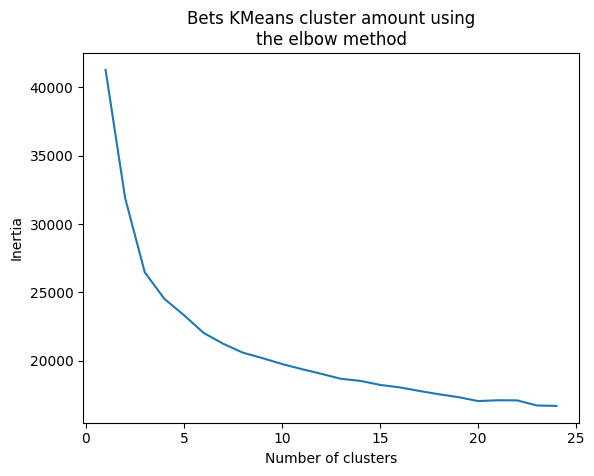

In [47]:
# We will use the elbow method to find the optimal number of clusters for K-Means

kmeans_inertia = []

for i in range(1,25):
    kmeans = KMeans(n_clusters=i, random_state=0, n_init="auto")
    kmeans.fit(df)
    kmeans_inertia.append(kmeans.inertia_)

print(kmeans_inertia)
plt.plot(range(1, 25), kmeans_inertia)
plt.title('Bets KMeans cluster amount using\nthe elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

BEST_CLUSTER_AMOUNT = 20

> Based on the observations of the graph, the inertia stabilizes around 16000, to find a compromise, the N value will be 20 as it is the point where the inertia stabilizes and the number of clusters is not too high.

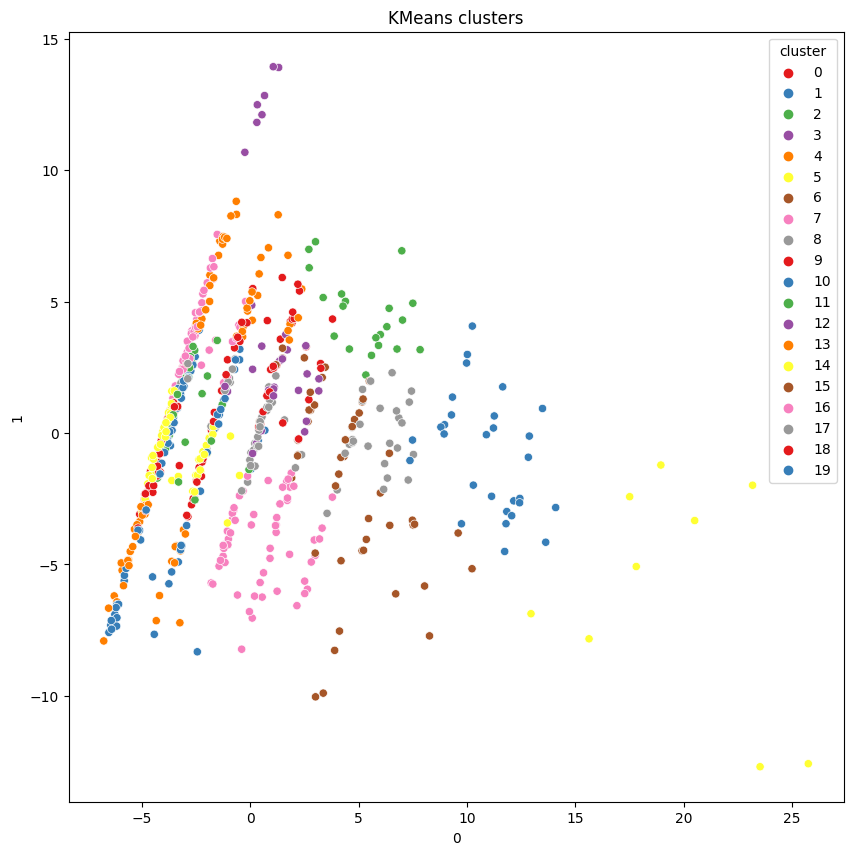

In [49]:
kmeans = KMeans(n_clusters=BEST_CLUSTER_AMOUNT, n_init='auto').fit_predict(df)

# Reduce dimensionality to 2D using PCA and plot the results

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(df)

pca_df = pd.DataFrame(pca.transform(df))
pca_df['cluster'] = kmeans

plt.figure(figsize=(10, 10))
sns.scatterplot(x=0, y=1, hue='cluster', data=pca_df, palette='Set1')
plt.title('KMeans clusters')
plt.show()


### Observations

Based on the final plotting using PCA to reduce the dimensionality of all the attributes down to 2D, we can observe the model manages to cluster individuals, altough the PCA creates a visualisation bias in the data, the clusters are still visible.

### Improvements

The model could be improved by using a different dimensionality reduction method, such as t-SNE, which is more adapted to clustering. The model could also be improved by using a different clustering method, such as DBSCAN, which is more adapted to non-spherical clusters, some data transformation could also be applied to reduce dimensionality and improve the clustering.